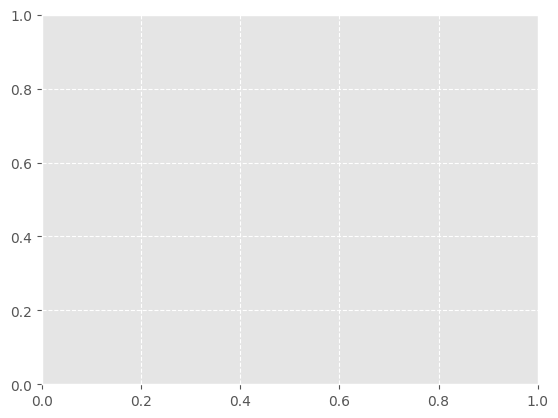

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
%matplotlib inline


plt.style.use('ggplot')
plt.grid(linestyle='--') 

# plt.style.use('dark_background')

filename='vehicles.csv'
df=pd.read_csv(filename,parse_dates=['posting_date'])


### Data Cleaning and Preprocessing

In [49]:

df=df.drop(columns=['county','state','lat','long'])
# filters
# df = df[df['posting_date'] > 2019]
df = df[df['year'] > 1999]
df = df[df['odometer'] < 150000]
df = df[(df['condition'] == 'excellent') | (df['condition'] == 'good')]
df = df[(df['transmission'] == 'manual') | (df['transmission'] == 'automatic')]

# Find the top 8 most frequent manufacturers
top_num=10
top_manufacturers = df['manufacturer'].value_counts().head(top_num).index.tolist()

# Filter the DataFrame to include only the rows where 'manufacturer' is in the top 8
df = df[df['manufacturer'].isin(top_manufacturers)]

# manufacturer_list=['subaru','bmw','toyota','ford','lexus','gmc']
# df = df[df['manufacturer'].isin(manufacturer_list)]
# Convert 'cylinders' column to numeric, removing ' cylinders' text
df['cylinders'] = pd.to_numeric(df['cylinders'].str.replace(' cylinders', ''), errors='coerce')

# If needed, fill NaN values with 0 (or any other number)
# df['cylinders'] = df['cylinders'].fillna(0).astype(int)
# drop rows where 'description' is missing
df=df.dropna(subset=['description'])
df = df.replace({np.nan: None})
df['year'] = df['year'].astype(int)

In [50]:
# df['cylinders'] = df['cylinders'].str.replace(' cylinders', '').astype(int)
# Create the pivot table
dfp = df.pivot_table(index='manufacturer', columns='cylinders', values='id', aggfunc='count')
# Dynamically set colors based on the number of unique transmission types
transmission_types = df['transmission'].unique()



C:\Users\Vram\AppData\Local\Temp\ipykernel_19128\3399463794.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Vram\AppData\Local\Temp\ipykernel_19128\3399463794.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



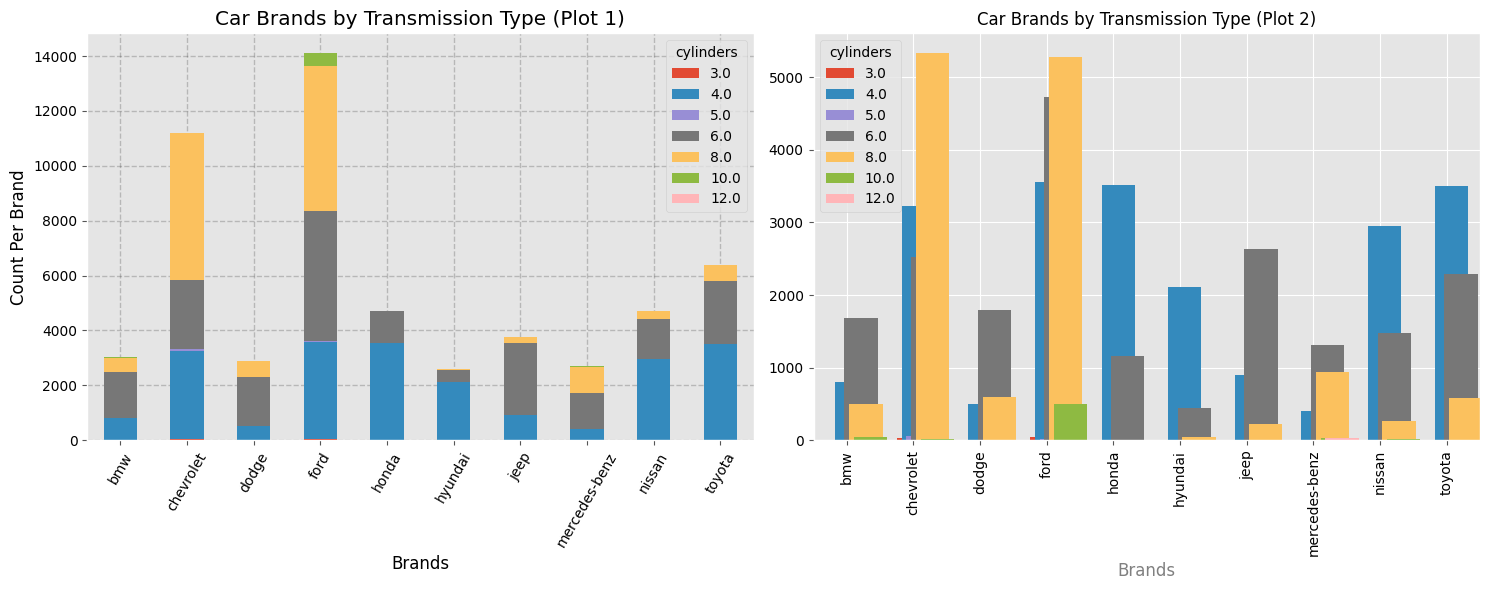

In [51]:




# Create subplots (2 columns, 1 row)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the first chart (Plot a - stacked bars)
dfp.plot(kind="bar", stacked=True, ax=ax1)
ax1.set_xlabel("Brands", color='black')
ax1.set_ylabel("Count Per Brand", color='black')
ax1.set_title('Car Brands by Transmission Type (Plot 1)')
ax1.set_xticklabels(dfp.index, rotation=60, color='black')
ax1.set_yticklabels(ax1.get_yticklabels(), color='black')
ax1.grid(True,color='black', linestyle='--', linewidth=1,alpha=0.2)


# Plot the second chart (Plot b - grouped bars with violations)
dfp.plot(kind="bar",  stacked=False, ax=ax2)  # Grouped bars

# ax2.grid(color='black', linestyle=':', linewidth=2, alpha=0.7)  # More visible and excessive gridlines

for rect in ax2.patches:
    rect.set_width(0.5)  # Make the bars thinner

# Adding unnecessary visual clutter:
ax2.set_xlabel("Brands", color='gray')  # Hard-to-read axis label color
ax2.set_title('Car Brands by Transmission Type (Plot 2)', fontsize=12, color='black')  # Unclear title color

ax2.set_xticklabels(dfp.index, rotation=90, color='black')  # Over-rotated x-tick labels
ax2.set_yticklabels(ax2.get_yticklabels(), color='black')  # Unnecessary color change for y-tick labels

# Remove the y-axis label on the second plot (Plot b)
ax2.set_ylabel('')

# Adjust the y-axis limits to remove excess space at the top
ax2.set_ylim(bottom=0)  # Set the bottom of the y-axis to 0
# ax2.set_ylim(top=ax2.get_ylim()[1] * 1.1)  # Increase the top limit slightly to ensure the bars fit nicely
# ax2.grid(color='black', linestyle='--', linewidth=0.5)


# Adjust layout to make sure the plots don't overlap
plt.tight_layout()

# Show the plots
plt.show()


In [52]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'posting_date'],
      dtype='object')

C:\Users\Vram\AppData\Local\Temp\ipykernel_19128\2564418399.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Vram\AppData\Local\Temp\ipykernel_19128\2564418399.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Vram\AppData\Local\Temp\ipykernel_19128\2564418399.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Vram\AppData\Local\Temp\ipykernel_19128\2564418399.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\Vram\AppData\Local\Temp\ipykernel_19128\2564

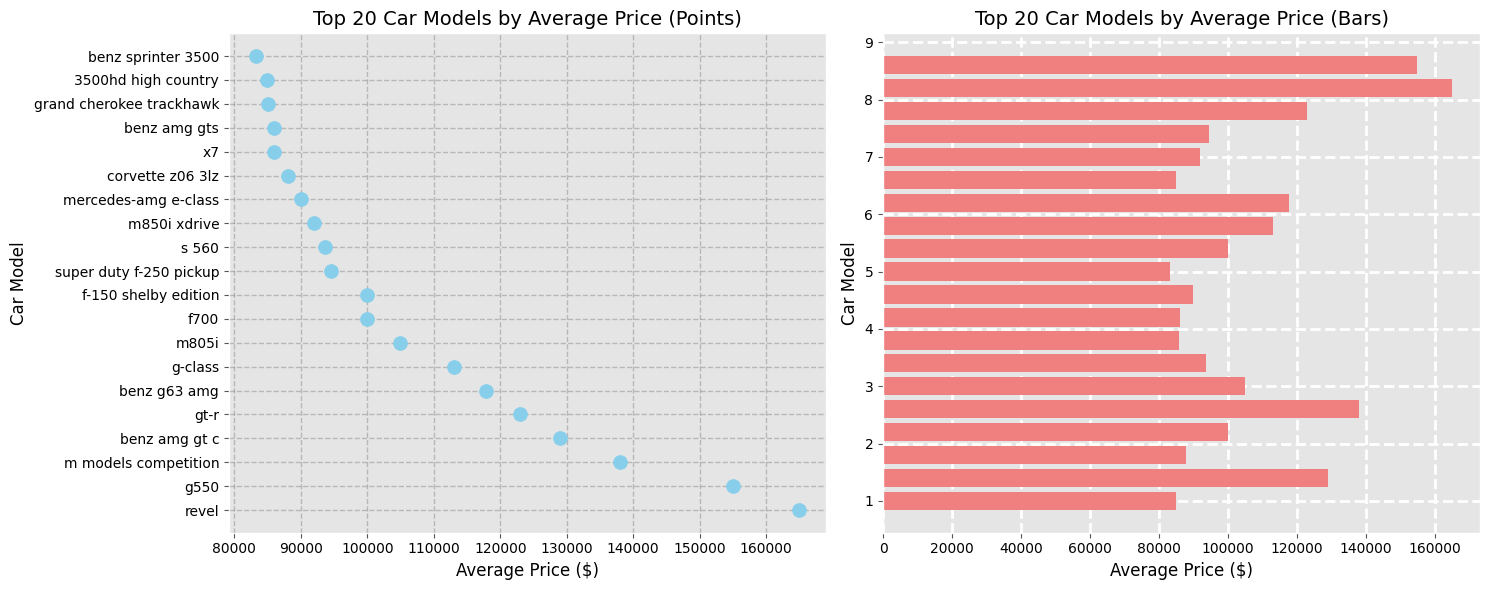

In [53]:
# Step 1: Drop rows where 'model' or 'price' are missing
df_cleaned = df.dropna(subset=['model', 'price'])

# Step 2: Convert 'price' to numeric if it's not already (handles potential errors)
df_cleaned['price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')

# Group by 'model' and calculate the average price per model
avg_price_per_model = df_cleaned.groupby('model')['price'].mean().sort_values(ascending=False).head(20)

# avg_price_per_model2 = df_cleaned.groupby('model')['price'].mean().sort_values(ascending=False).head(20)
avg_price_per_model2 = avg_price_per_model.sample(frac=1).reset_index(drop=True)



# Create subplots (2 columns, 1 row)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left Plot (Scatter Plot with Points)
ax1.scatter(avg_price_per_model.values, avg_price_per_model.index, color='skyblue', s=100)  # s=100 for point size
ax1.set_xlabel('Average Price ($)', color='black')
ax1.set_ylabel('Car Model', color='black')
ax1.set_title('Top 20 Car Models by Average Price (Points)', fontsize=14, color='black')
ax1.set_xticklabels(ax1.get_xticklabels(), color='black')
ax1.set_yticklabels(avg_price_per_model.index, color='black')
ax1.grid(True,color='black', linestyle='--', linewidth=1,alpha=0.2)


# Right Plot (Bar Plot)
ax2.barh(avg_price_per_model2.index, avg_price_per_model2.values, color='lightcoral')
ax2.set_xlabel('Average Price ($)', color='black')
ax2.set_ylabel('Car Model', color='black')
ax2.set_title('Top 20 Car Models by Average Price (Bars)', fontsize=14, color='black')
ax2.set_xticklabels(ax2.get_xticklabels(), color='black')
ax2.set_yticklabels(avg_price_per_model2.index, color='black')
ax2.grid(True, linestyle='--', linewidth=2)

# Adjust layout to make sure the plots don't overlap
plt.tight_layout()

# Show the plots
plt.show()

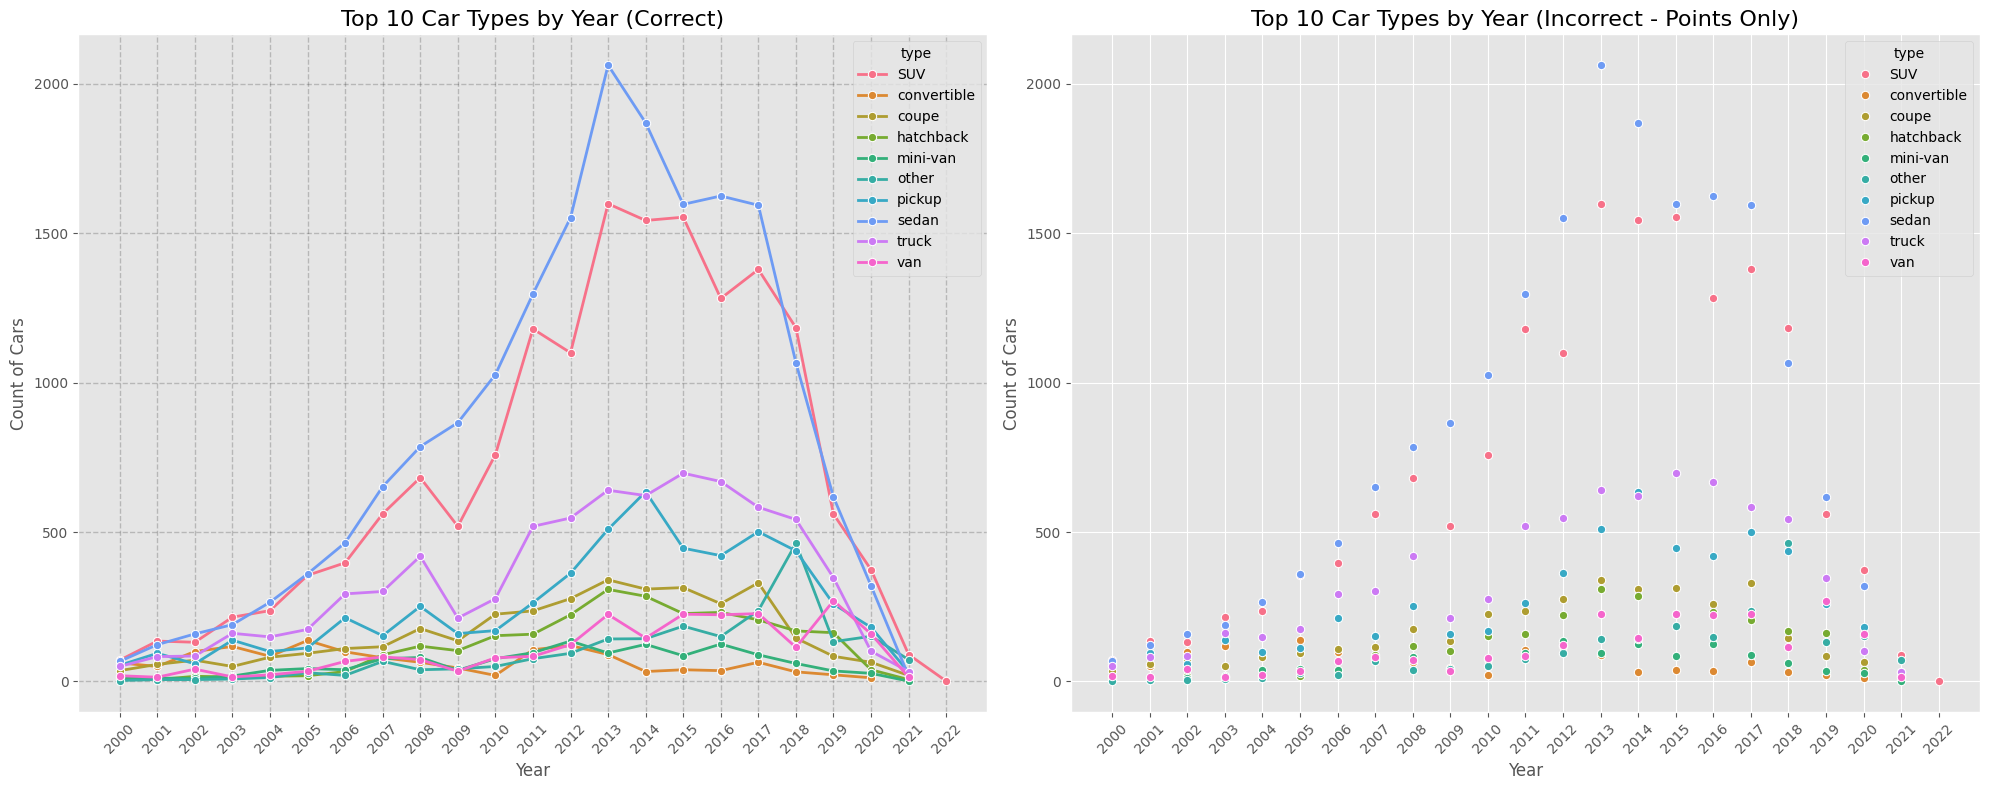

In [54]:
# Count the frequency of each car type to get the top 10 most frequent car types
top_types = df['type'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 car types
df_top_types = df[df['type'].isin(top_types)]

# Group by car type and year to get the count of cars per type per year
type_year_counts = df_top_types.groupby(['type', 'year']).size().reset_index(name='count')

# Create subplots (2 columns, 1 row)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Left Plot (Correct Line Plot)
sns.lineplot(x='year', y='count', hue='type', data=type_year_counts, marker='o', lw=2, ax=ax1)
ax1.set_title('Top 10 Car Types by Year (Correct)', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Count of Cars', fontsize=12)
ax1.set_xticks(type_year_counts['year'].unique())
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True,color='black', linestyle='--', linewidth=1,alpha=0.2)



# Right Plot (Incorrect - Points Only, No Lines)
sns.lineplot(x='year', y='count', hue='type', data=type_year_counts, marker='o', lw=0, ax=ax2)
ax2.set_title('Top 10 Car Types by Year (Incorrect - Points Only)', fontsize=16)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Count of Cars', fontsize=12)
ax2.set_xticks(type_year_counts['year'].unique())
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to make sure the plots don't overlap
plt.tight_layout()

# Show the plots
plt.show()


In [55]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'posting_date'],
      dtype='object')

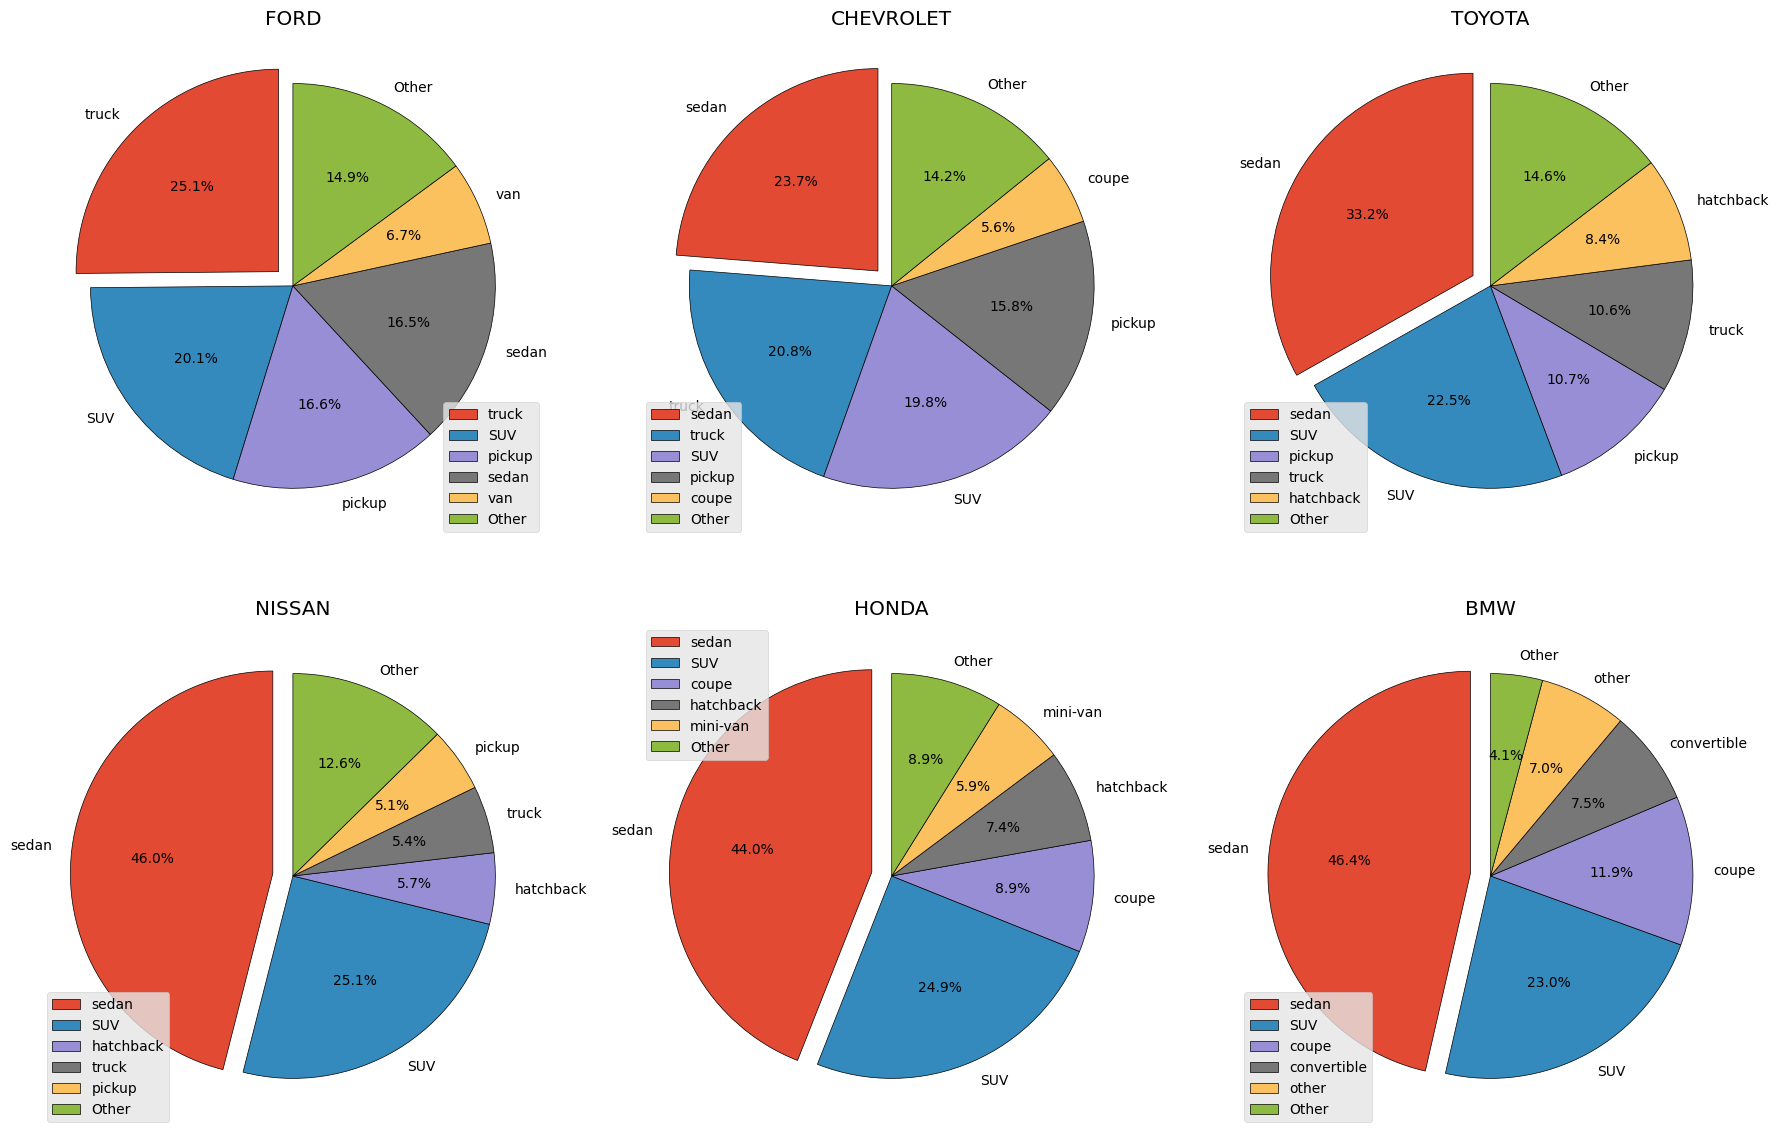

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'manufacturer' and 'type' and count the number of cars for each type in each brand
brand_type_counts = df.groupby(['manufacturer', 'type']).size().reset_index(name='count')

# List of the top 5 brands based on the total number of cars
top_5_brands = brand_type_counts.groupby('manufacturer')['count'].sum().nlargest(6).index

# Set up the plot with subplots (one for each top brand)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns for better distribution
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each top brand and plot the pie chart for the distribution of car types
for i, brand in enumerate(top_5_brands):
    # Filter data for the current brand
    brand_data = brand_type_counts[brand_type_counts['manufacturer'] == brand]
    
    # Slice the largest car types (top 5 by count)
    top_car_types = brand_data.nlargest(5, 'count')  # Get the top 5 car types for the brand
    
    # If there are more than 5 car types, group the others into an "Other" category
    if len(brand_data) > 5:
        other_count = brand_data.loc[~brand_data['type'].isin(top_car_types['type'])]['count'].sum()
        
        # Create a DataFrame for the 'Other' category
        other_row = pd.DataFrame({'manufacturer': [brand], 'type': ['Other'], 'count': [other_count]})
        
        # Concatenate the 'Other' row with the top car types
        top_car_types = pd.concat([top_car_types, other_row], ignore_index=True)
    
    # Determine which car type is the largest
    largest_car_type_index = top_car_types['count'].idxmax()

    # Create explode array: 0 for all slices except the largest, which will be 0.1 to make it stand out
    explode = [0.1 if i == largest_car_type_index else 0 for i in range(len(top_car_types))]

    # Plot pie chart for the current brand's car type distribution
    axes[i].pie(top_car_types['count'], labels=top_car_types['type'], autopct='%1.1f%%', startangle=90,
                wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 10}, explode=explode)
    axes[i].set_title(f"{brand.upper()}")

    # Add a legend
    axes[i].legend(top_car_types['type'], loc="best", fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


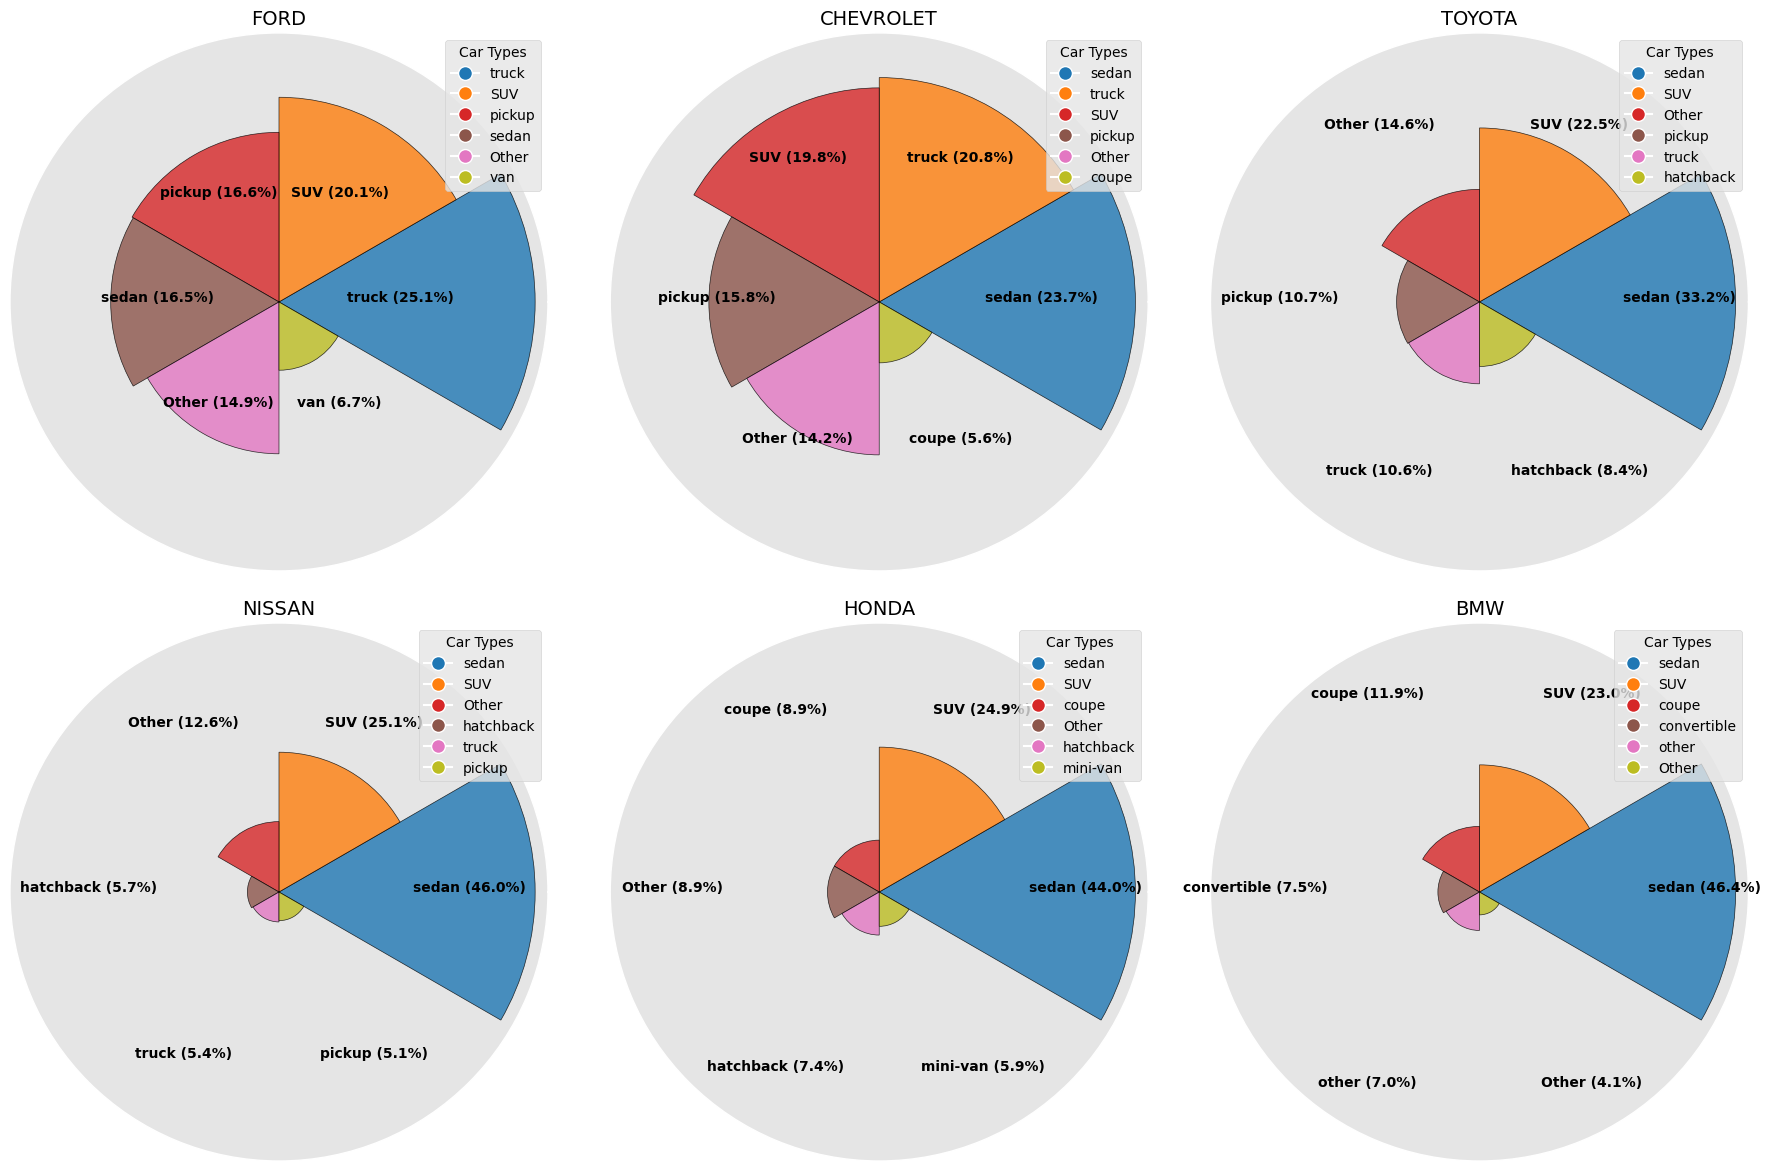

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group the data by 'manufacturer' and 'type' and count the number of cars for each type in each brand
brand_type_counts = df.groupby(['manufacturer', 'type']).size().reset_index(name='count')

# List of the top 5 brands based on the total number of cars
top_5_brands = brand_type_counts.groupby('manufacturer')['count'].sum().nlargest(6).index

# Set up the plot with subplots (one for each top brand)
fig, axes = plt.subplots(2, 3, figsize=(18, 12), subplot_kw={'projection': 'polar'})  # 2 rows, 4 columns for better distribution
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each top brand and plot the radial bar chart for the distribution of car types
for i, brand in enumerate(top_5_brands):
    # Filter data for the current brand
    brand_data = brand_type_counts[brand_type_counts['manufacturer'] == brand]
    
    # Slice the largest car types (top 5 by count)
    top_car_types = brand_data.nlargest(5, 'count')  # Get the top 5 car types for the brand
    
    # If there are more than 5 car types, group the others into an "Other" category
    if len(brand_data) > 5:
        other_count = brand_data.loc[~brand_data['type'].isin(top_car_types['type'])]['count'].sum()
        
        # Create a DataFrame for the 'Other' category
        other_row = pd.DataFrame({'manufacturer': [brand], 'type': ['Other'], 'count': [other_count]})
        
        # Concatenate the 'Other' row with the top car types
        top_car_types = pd.concat([top_car_types, other_row], ignore_index=True)
    
    # Sort the car types in descending order by count (to arrange slices clockwise)
    top_car_types_sorted = top_car_types.sort_values(by='count', ascending=False)
    
    # Number of car types (bars)
    num_types = len(top_car_types_sorted)
    
    # Calculate the angle width for each bar (divide 2π by the number of bars)
    angle_width = 2 * np.pi / num_types
    
    # Calculate the angles for each bar (dividing the circle into equal parts)
    angles = np.linspace(0, 2 * np.pi, num_types, endpoint=False).tolist()
    
    # Add the first angle to the end to close the circle
    values = top_car_types_sorted['count'].tolist()
    angles += angles[:1]
    values += values[:1]
    
    # Create the radial bar chart with unique colors (matplotlib default colors)
    for j in range(num_types):
        axes[i].bar(angles[j], values[j], width=angle_width, bottom=0.2, edgecolor='black', 
                    color=plt.cm.tab10(j / num_types), alpha=0.8, zorder=2)  # Using matplotlib's default colormap
    
    # Set a constant label radius of 1800 (fixed distance for all labels)
    label_radius = 1800  # Adjust this value to set the distance of labels from the center
    
    # Add labels to the outermost part of the circle (car types and percentages)
    total_count = top_car_types_sorted['count'].sum()  # Total number of cars for the current brand
    
    for j, angle in enumerate(angles[:-1]):  # Skip the last duplicate angle
        label_angle = angle  # Same angle as the bar
        
        # Calculate percentage
        percentage = (values[j] / total_count) * 100
        percentage_text = f'{top_car_types_sorted["type"].iloc[j]} ({percentage:.1f}%)'
        
        # Place the text at the outermost part of the circle with fixed radius (1800)
        axes[i].text(label_angle, label_radius, percentage_text, 
                     horizontalalignment='center', size=10, color='black', weight='semibold', zorder=3)
    
    # Set the title for the radial bar chart
    axes[i].set_title(f"{brand.upper()}", size=14)

    # Remove radial axis ticks and labels
    axes[i].set_yticklabels([])
    axes[i].set_xticklabels([])
    axes[i].set_xticks(angles[:-1])  # Set the angles as x-ticks
    
    # Optionally, we can remove the grid lines for a cleaner look
    axes[i].grid(False)
    
    # Add a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(j / num_types), markersize=10)
               for j in range(num_types)]
    axes[i].legend(handles, top_car_types_sorted['type'], title="Car Types", loc='best', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
